In [129]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
default_path = '/content/drive/My Drive/INF ML 552/HW3 - PCA, FM/'
data = pd.read_csv(default_path + 'fastmap-data.txt', header=None, sep='\t')
# data = data.rename(columns={0:'X', 1:'Y'})


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data

In [130]:
import random
def get_farthest_point(data, x, pivot, old_i):
  
  m = -1
  m_ind = -1
  for j in range(1,11):
    if pivot != j:
      com = get_distance(pivot,j,data,x)
      if m< com:
        m = com
        m_ind = j
  if m_ind == old_i:
    return pivot,old_i
  else:
    return get_farthest_point(data, x, m_ind, pivot)

def farthest(data,x):
  i = random.randint(1,11)
  m = -1
  m_ind = -1
  for j in range(1,11):
    if i != j:
      com = get_distance(i,j,data,x)
      if m< com:
        m = com
        m_ind = j
  return get_farthest_point(data, x, m_ind, i)

farthest(data,[[3.875, 3.0, 0, 1.0416666666666667, 2.4583333333333335, 9.5, 2.4583333333333335, 1.5, 2.4583333333333335, 12]])

(7, 5)

In [0]:
def get_distance(i,j,data,x):
  if i == j: return 0
  if(data.index[(data[0] == i) & (data[1] == j)].to_list() != []):
    val = data[2][(data.index[(data[0] == i) & (data[1] == j)]).to_list()[0]]
  else:
   val = data[2][(data.index[(data[0] == j) & (data[1] == i)]).to_list()[0]]
  # print(i,j,val)
  val = val * val
  sec = 0
  print(x,i,j)
  for k in range(len(x)):
    sec = sec + math.pow((x[k][i-1] - x[k][j-1]),2)
  val = math.sqrt(val - sec)
  return val

In [0]:
import math
def fastmap(x, count, k, data):
  if count == k:
    return x
  r = []
  #find farthest point
  farthest_point_a, farthest_point_b = farthest(data,x)
  for i in range(1,11):
    if i != farthest_point_a and i != farthest_point_b:
      r.append((math.pow(get_distance(farthest_point_a,i,data,x),2) + 
                       math.pow(get_distance(farthest_point_a,farthest_point_b,data,x),2) - 
                       math.pow(get_distance(i,farthest_point_b,data,x),2))
                       /2/get_distance(farthest_point_a, farthest_point_b,data,x))
      
    elif i == farthest_point_a:
      r.append(0)
    elif i == farthest_point_b:
      r.append(get_distance(farthest_point_a,farthest_point_b,data,x))
  x.append(r)  
  return fastmap(x, count+1, k, data)
x = (fastmap([],0,2,data))


In [0]:
x = pd.DataFrame(x).transpose()

In [0]:
labels = pd.read_csv(default_path + 'fastmap-wordlist.txt', header=None, sep='\t')
x[2] = labels[0]

In [145]:
x

,0,1,2
0,3.875000,6.0625,acting
1,3.000000,7.7500,activist
2,0.000000,4.0000,compute
3,1.041667,1.1875,coward
4,2.458333,0.0000,forward
5,9.500000,5.1875,interaction
6,2.458333,8.0000,activity
7,1.500000,1.5625,odor
8,2.458333,1.0000,order
9,12.000000,4.0000,international


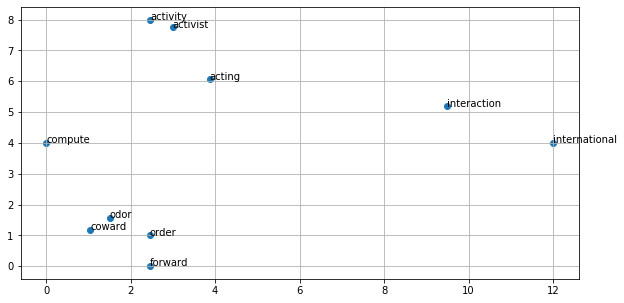

In [140]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

A = x[0]
B = x[1]

plt.scatter(A,B)
for i in range(10):                                       # <--
    ax.annotate('%s' % labels[0][i], xy=(x[0][i],x[1][i]), textcoords='data') # <--

plt.grid()
plt.show()

In [0]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)

A = x[0]
B = [1]*10
print(x)
plt.scatter(A,B)
for i in range(10):                                       # <--
    ax.annotate('%s' % labels[0][i], xy=(x[0][i],B[i]), textcoords='data') # <--

plt.grid()
plt.show()

[[3.875, 3.0, 0, 1.0416666666666667, 2.4583333333333335, 9.5, 2.4583333333333335, 1.5, 2.4583333333333335, 12], [47.72298177083334, 63.599934895833336, 32.0, 14.778320312499996, 0, 44.146620008680564, 64.0, 5.442464192708332, 2.0, 31.999999999999996]]


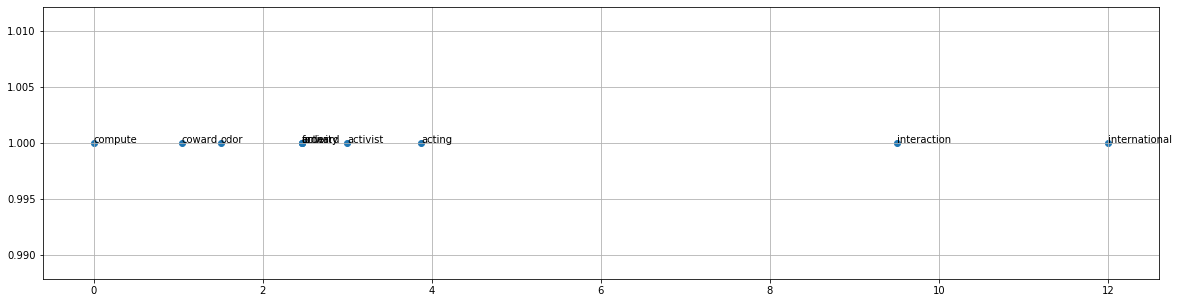

In [104]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

A = x[0]
B = [1]*10
print(x)
plt.scatter(A,B)
for i in range(10):                                       # <--
    ax.annotate('%s' % labels[0][i], xy=(x[0][i],B[i]), textcoords='data') # <--

plt.grid()
plt.show()